<a href="https://colab.research.google.com/github/sreeja-g/sampling_mc/blob/master/Importance_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importance Sampling

In [0]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
x = np.linspace(0, 4, 50) 

In [0]:
def f(x):
    return 1/(1 + np.exp(-x))

In [0]:
def p(x):
    return st.norm(3.5,1).pdf(x)

def q(x):
    return st.norm(3,1).pdf(x)

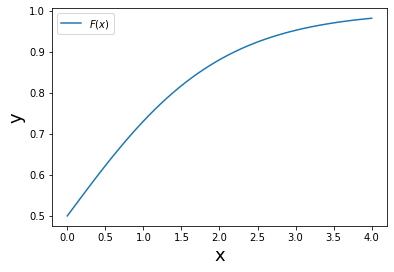

In [47]:
plt.plot(x, f(x), label="$F(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(loc='best')
plt.show()

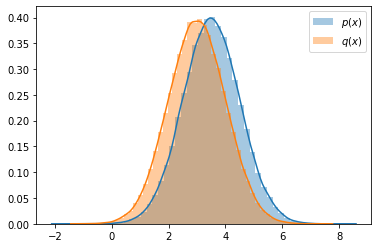

In [48]:
sns.distplot([np.random.normal(3.5, 1) for _ in range(100000)], label="$p(x)$")
sns.distplot([np.random.normal(3, 1) for _ in range(100000)], label="$q(x)$")

plt.legend()

In [49]:
def sampling_p_x(iter=1000):
    
    samples_p_x = []

    for i in range(iter):
        z = np.random.normal(3.5, 1)
        
        samples_p_x.append(f(z))

    return np.array(samples_p_x)

print(np.mean(sampling_p_x(iter=100000)))

0.9553811218041101


In [0]:
def importance_sampling(iter=1000):
    
    samples = []

    for i in range(iter):
        z = np.random.normal(3, 1)
        
        samples.append(f(z)*(p(z)/q(z)))

    return np.array(samples)

In [0]:
imp_sampling = importance_sampling(iter=100000)

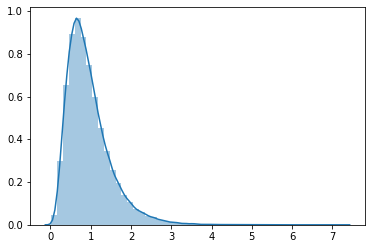

In [52]:
sns.distplot(imp_sampling)

In [53]:
print("average {} variance {}".format(np.mean(imp_sampling), np.var(imp_sampling)))

average 0.9563582974170959 variance 0.2979932550554292
